# **Heart** **Attack** **Prediction**

*The main aim of  this project is to predict the chances of heart attack by analysing some medical properties like blood pressure,chest pain,sugar,cholestoral,maximum heart rate achieved* 

In [3]:
#Importing all the necessary librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score

In [4]:
#Loading dataset and Reading
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Data** **Preprocessing**

In [6]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

We have 5 numerical feature and 8 categorical feature in our data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All our categorical nature column has integer type of data type so first we convert into an object data type 

In [8]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_columns = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
df[cat_columns] = df[cat_columns].astype(str)

In [9]:
df.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Median and mean values of all the numerical features are comparable. Therefore, I don't think there are any outliers in our numerical features

# **Handling** **Missing** **values**

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

As there is no null value our data is clean for preprocessing

# **Visualization**

Let us check how our numerical features change based on target columns

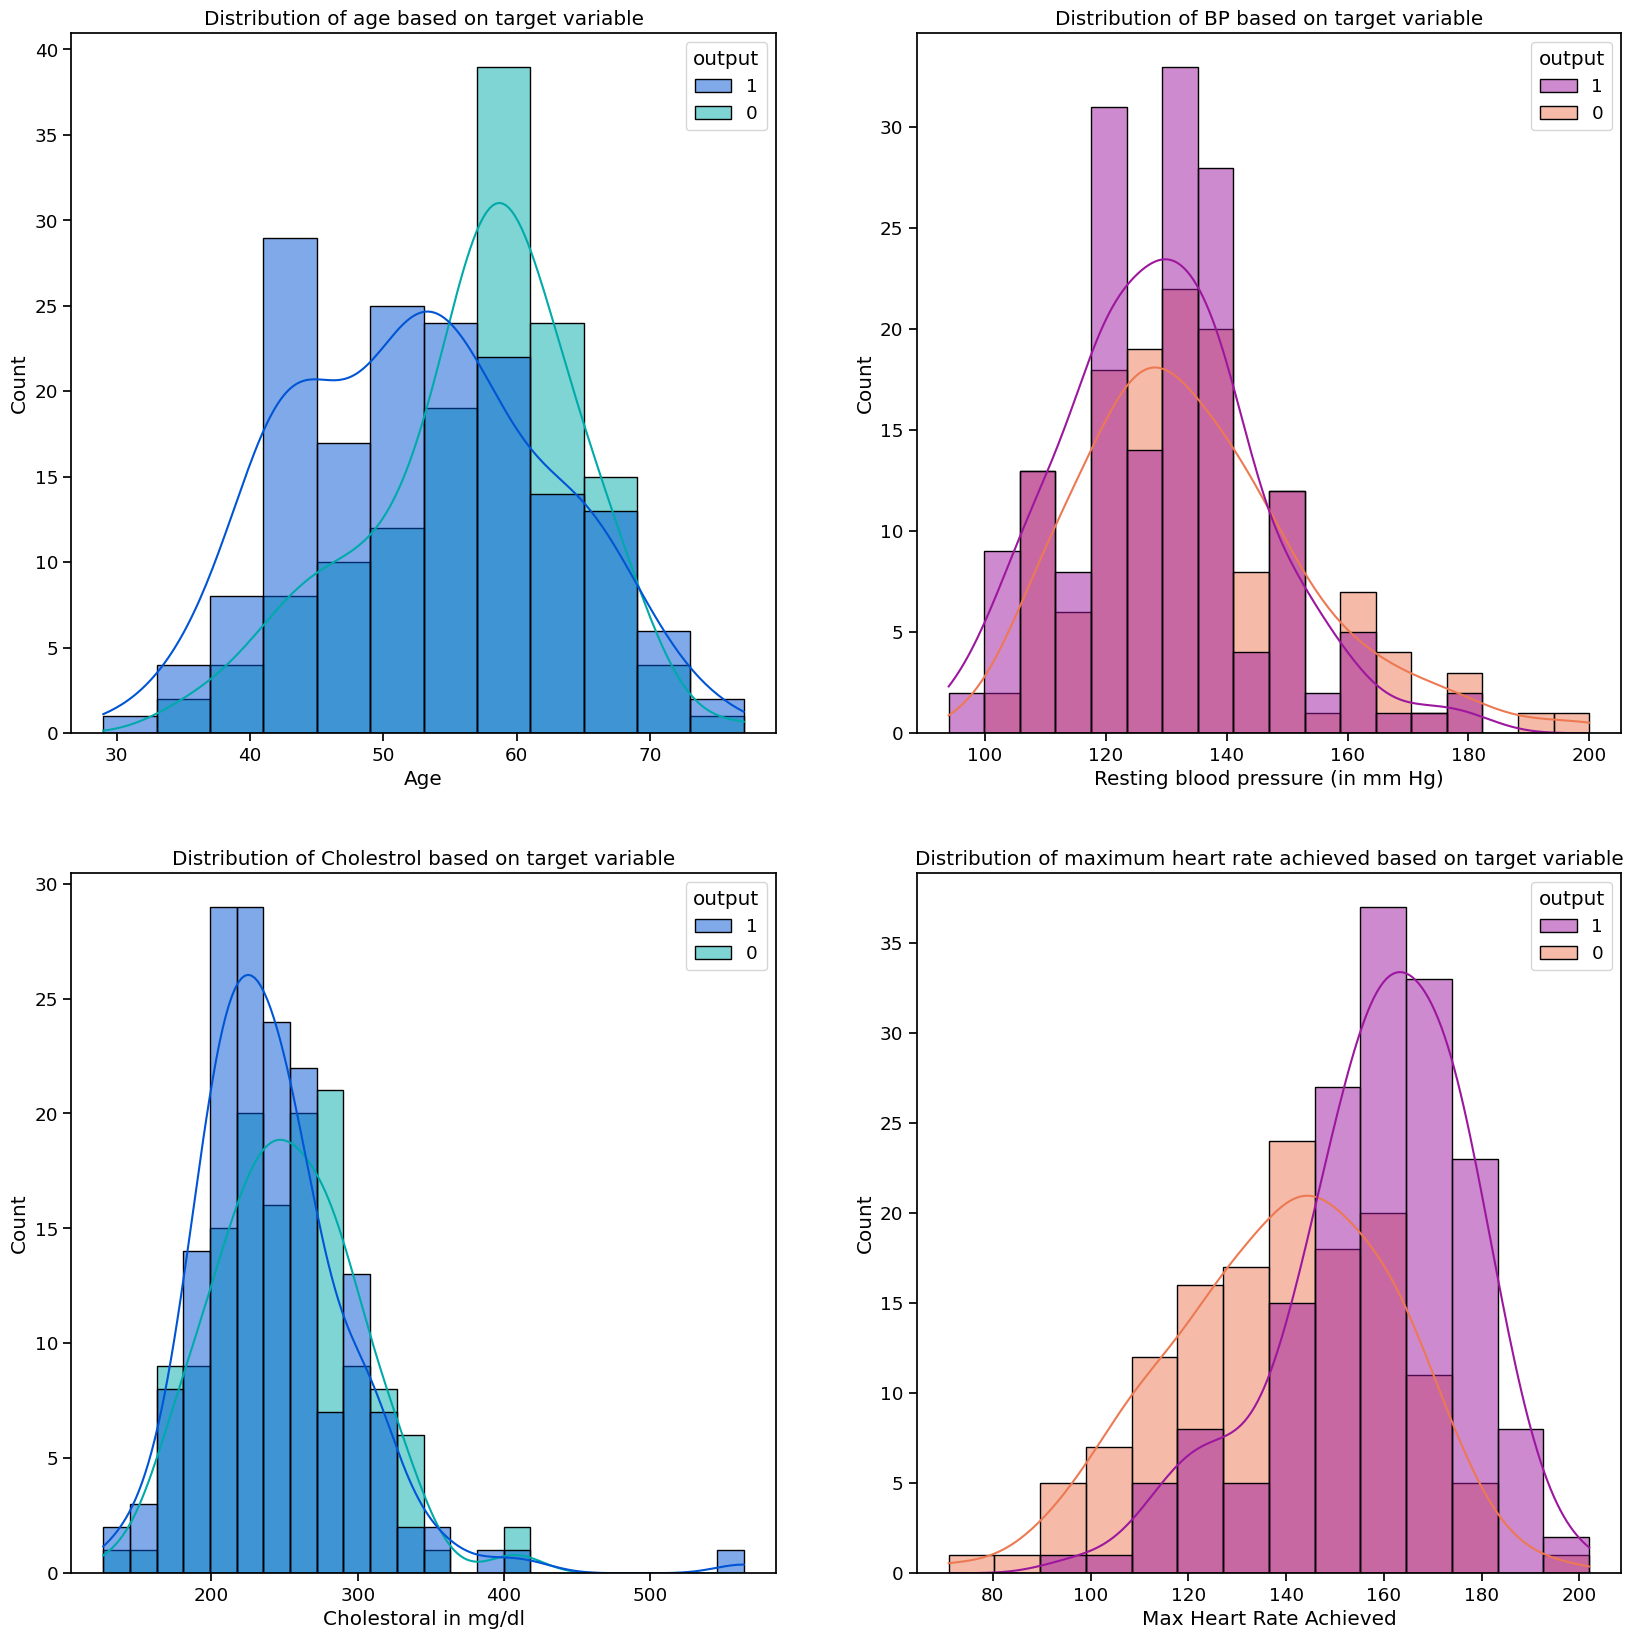

In [11]:
sns.set_context('notebook',font_scale=1.2)
fig, ax=plt.subplots(2,2,figsize=(20,20))
plt.title('Distribution of various feature based on target ')
a1 = sns.histplot(x ='age', data= df, hue= 'output',kde=True, ax=ax[0, 0], palette='winter')
a1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

a2 = sns.histplot(x ='trtbps', data= df, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
a2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

a3 = sns.histplot(x ='chol', data= df, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
a3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

a4 = sns.histplot(x ='thalachh', data=df, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
a4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

We can clearly seen that the person who had maximum heart rate achieved having a great chance of heart attack

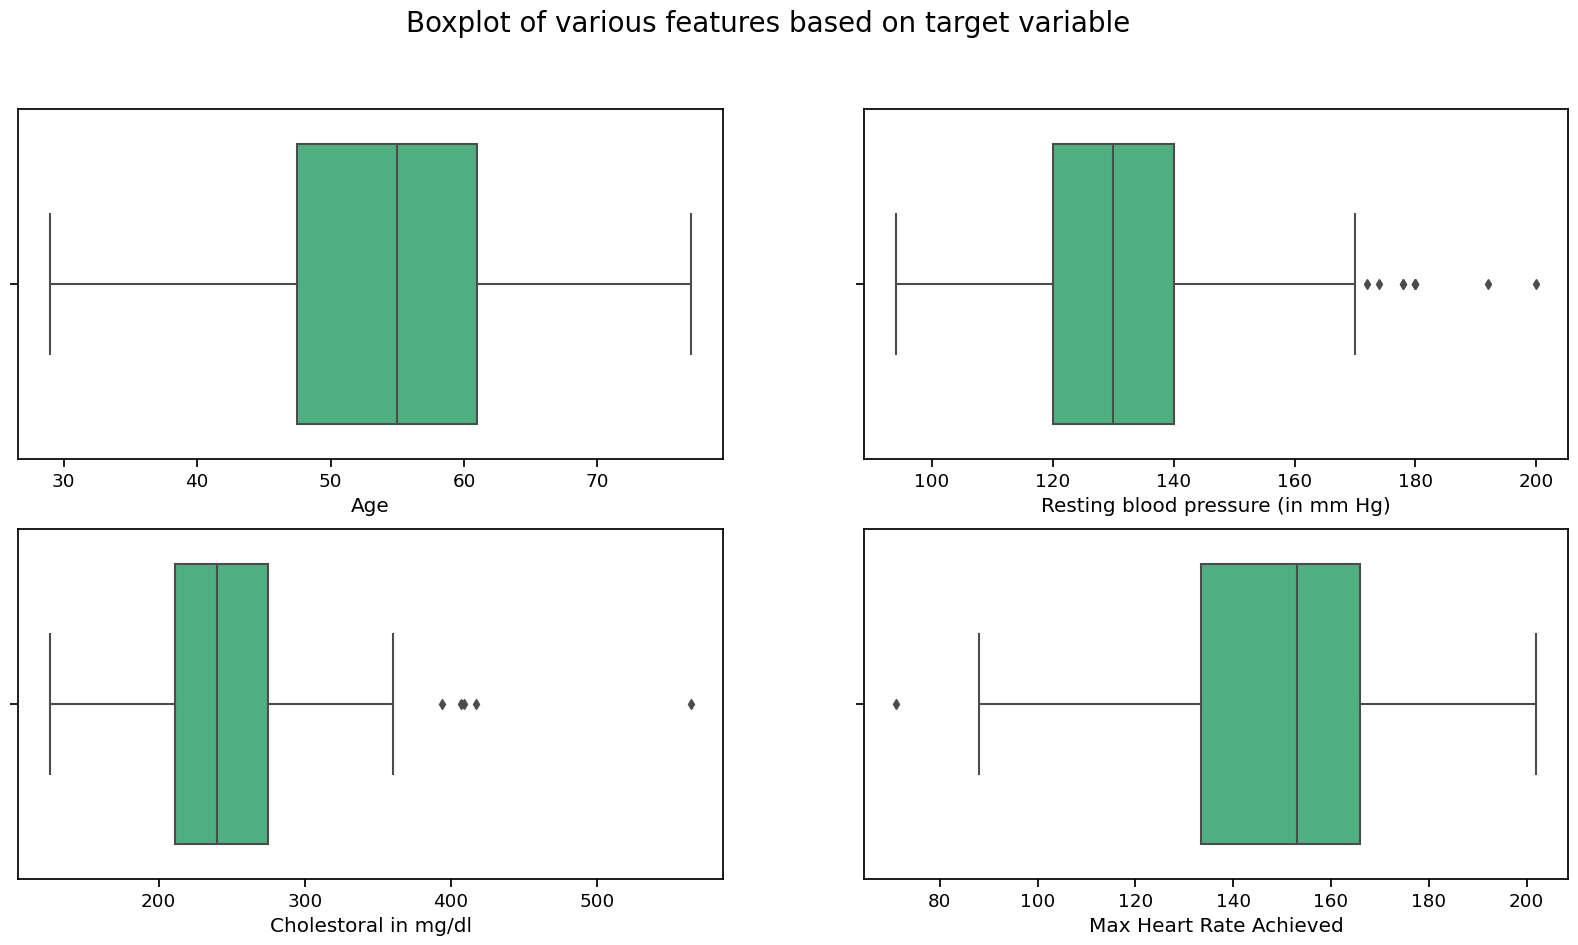

In [12]:
# To check outlier is present or not

sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

plt.suptitle('Boxplot of various features based on target variable', fontsize = 20)

b1 = sns.boxplot(x ='age', data=df, ax= ax[0, 0], color = '#40bf80')
b1.set(xlabel = 'Age')

b2 = sns.boxplot(x ='trtbps', data=df, ax= ax[0, 1], color='#40bf80')
b2.set(xlabel = 'Resting blood pressure (in mm Hg)')

b3 = sns.boxplot(x ='chol', data=df, ax= ax[1, 0], color= '#40bf80')
b3.set(xlabel = 'Cholestoral in mg/dl')

b4 = sns.boxplot(x ='thalachh', data=df, ax= ax[1, 1], color = '#40bf80')
b4.set(xlabel = 'Max Heart Rate Achieved')

plt.show()


As we clearly seen that there are outlier present in cholestoral and blood pressure column.

<Axes: >

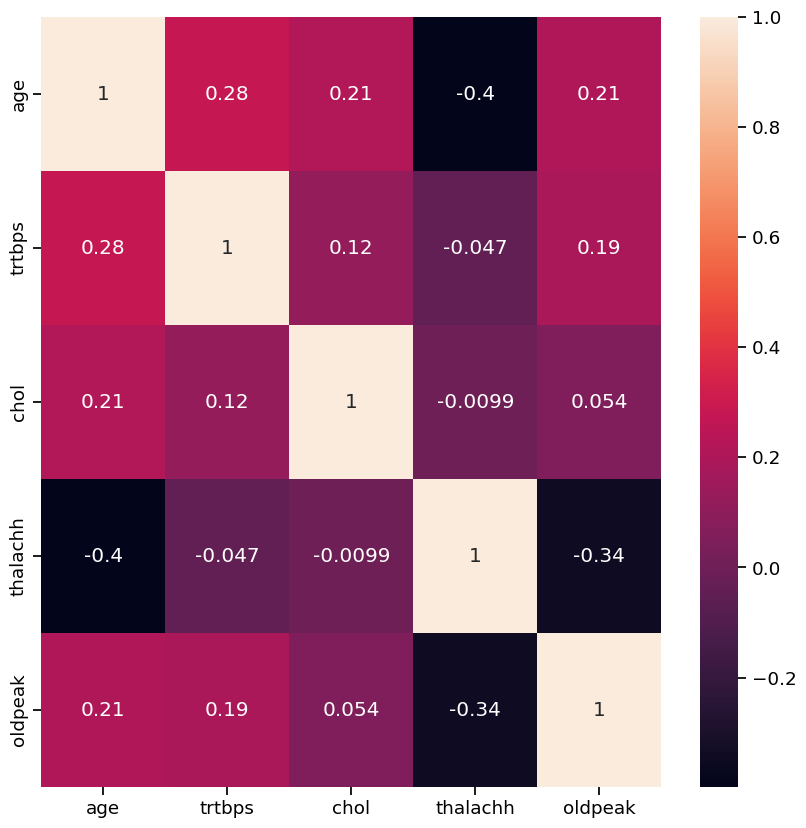

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

As with the help of heatmap we see that there is no correlation in our numerical columns

In [14]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<Axes: xlabel='output', ylabel='count'>

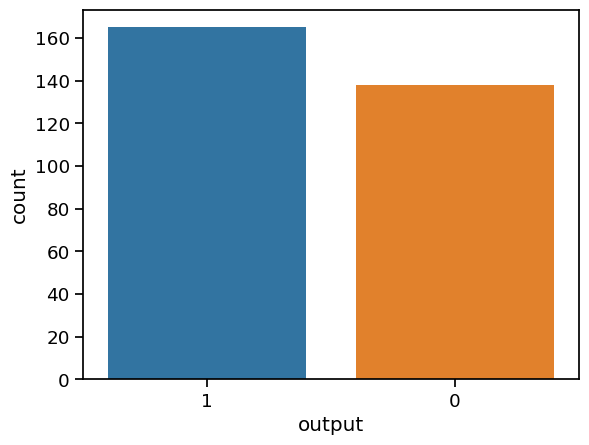

In [15]:
sns.countplot(data=df,x=df['output'])

Hence with above countplot we can clearly seen that our target column is balanced in nature.

<Axes: title={'center': 'No of chances of heart attack'}, ylabel='output'>

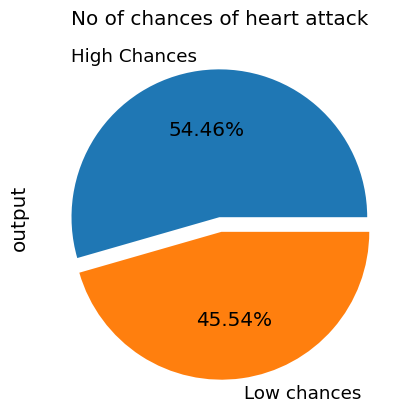

In [16]:
plt.title('No of chances of heart attack')
df['output'].value_counts().plot.pie(autopct='%1.2f%%',labels=['High Chances','Low chances'],explode=(0,0.1))

In [17]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_columns = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
df[cat_columns] = df[cat_columns].astype(float)

In [19]:
#To seperate x and y
x=df.iloc[::-1].values
x

array([[57.,  0.,  1., ...,  1.,  2.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       ...,
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [63.,  1.,  3., ...,  0.,  1.,  1.]])

In [20]:
y=df['output'].values
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
#Split the train and testing part
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

# **Feature** **Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# **Early** **Stopping**

In [24]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

# **Model** **Building**

In [25]:
ann=Sequential()
#Hidden Layer
ann.add(Dense(units=100,activation="relu"))
ann.add(Dropout(0.20))
ann.add(Dense(units=50,activation="relu"))
#ann.add(Dense(units=100,activation="relu"))
#ann.add(Dropout(0.20))
#ann.add(Dense(units=50,activation="relu"))

ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),verbose=1,callbacks=[early_stop],batch_size=40,epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 50ms/step - loss: 0.6790 - accuracy: 0.5496 - val_loss: 0.6026 - val_accuracy: 0.7869
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5557 - accuracy: 0.8306 - val_loss: 0.5455 - val_accuracy: 0.7869
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4941 - accuracy: 0.8760 - val_loss: 0.4963 - val_accuracy: 0.8361
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4350 - accuracy: 0.9050 - val_loss: 0.4558 - val_accuracy: 0.8689
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4148 - accuracy: 0.8926 - val_loss: 0.4227 - val_accuracy: 0.8852
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3659 - accuracy: 0.9091 - val_loss: 0.3936 - val_accuracy: 0.9016
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3444 - accuracy: 0.9091 - val_loss: 0.3712 - val_accuracy: 0.9016
Epoch 8/100
7/7 [======

In [26]:
ann.history.history  #data points of loss with respect to epochs

{'loss': [0.679042637348175,
  0.5556644201278687,
  0.49414753913879395,
  0.4349645674228668,
  0.41483771800994873,
  0.3658524453639984,
  0.34436526894569397,
  0.32390210032463074,
  0.3074093163013458,
  0.2833193838596344,
  0.28734591603279114,
  0.25961968302726746,
  0.24588525295257568,
  0.23921360075473785,
  0.2456604242324829,
  0.2195860594511032,
  0.22054317593574524,
  0.22589850425720215,
  0.2137344926595688,
  0.20401158928871155,
  0.19858643412590027,
  0.19605402648448944,
  0.18457746505737305,
  0.1816374659538269,
  0.18076235055923462,
  0.19881212711334229,
  0.17792081832885742,
  0.16966095566749573,
  0.1756734400987625,
  0.1715422123670578,
  0.16270342469215393,
  0.16802552342414856,
  0.16626514494419098,
  0.1653793752193451],
 'accuracy': [0.5495867729187012,
  0.8305785059928894,
  0.8760330677032471,
  0.9049586653709412,
  0.8925619721412659,
  0.9090909361839294,
  0.9090909361839294,
  0.9008264541625977,
  0.9090909361839294,
  0.921487629

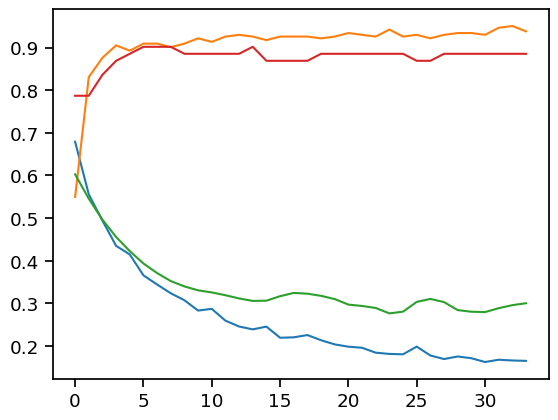

In [27]:
plt.plot(pd.DataFrame(ann.history.history))
plt.show()

In [28]:
ypred=ann.predict(xtest)

2/2 [==============================] - 0s 8ms/step


In [29]:
ypred=np.where(ypred<0.5,0,1)
ypred


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89        30
         1.0       0.96      0.81      0.88        31

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.90      0.89      0.88        61



In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[29  1]
 [ 6 25]]


As you can clearly seen by our matrix that our model classification is good

# **Roc** **Auc** **Curve**

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score

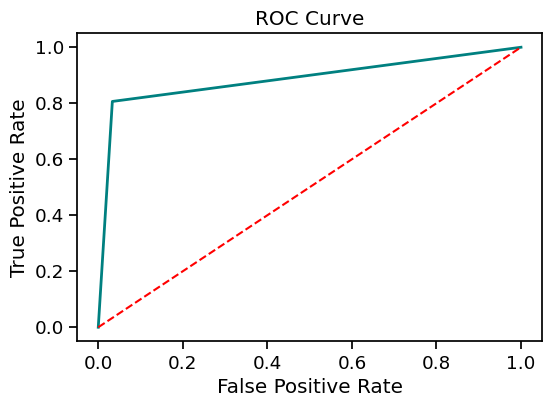

In [45]:
fpr, tpr, thresholds = roc_curve(ytest,ypred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [47]:
print(roc_auc_score(ytest,ypred))

0.8865591397849462


Here you can see that our roc auc curve is closest to 1,Hence our model is performing good while doing prediction whether the person has heart attack chances or not.